# Sonar Regression 

## Importing all modules

In [25]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import scale
#from sklearn import cross_validation
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error

import plotly   
from plotly.graph_objs import *
import plotly.offline as plot
import plotly.graph_objs as go
plot.offline.init_notebook_mode(connected=True)

# for OLS
import statsmodels.formula.api as sm
import statsmodels.stats.diagnostic as sms

## Importing files

In [26]:
Classification_Data = pd.read_csv("Ex07_Sonar_Classification.csv")
Regression_Data = pd.read_csv("Ex07_Sonar_Regreesion.csv")
Regression_Data.dropna(how = 'any', inplace = True)

In [27]:
Regression_Data.describe()

,EchoTime,WaterTemp,Clconcentration,Salinity,pH,Distance
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,5.345032,6.153846,19.000965,34.326193,7.999163,3340.646252
std,1.679166,2.471720,0.010422,0.018828,0.101059,1049.478542
min,1.287277,1.000000,18.973138,34.275922,7.772566,804.554269
25%,4.203284,4.000000,18.993692,34.313055,7.942581,2627.065247
50%,5.167752,6.000000,19.001236,34.326682,7.998218,3229.850749
75%,6.714399,8.000000,19.008847,34.340432,8.042021,4196.502496
max,9.371308,13.000000,19.023137,34.366248,8.260425,5857.064801


In [28]:
Regression_Data.corr()

,EchoTime,WaterTemp,Clconcentration,Salinity,pH,Distance
EchoTime,1.000000,-0.033243,-0.057243,-0.057243,0.103163,1.000000
WaterTemp,-0.033243,1.000000,0.126242,0.126242,-0.053225,-0.033242
Clconcentration,-0.057243,0.126242,1.000000,1.000000,0.086821,-0.057245
Salinity,-0.057243,0.126242,1.000000,1.000000,0.086821,-0.057245
pH,0.103163,-0.053225,0.086821,0.086821,1.000000,0.103162
Distance,1.000000,-0.033242,-0.057245,-0.057245,0.103162,1.000000


## Scaling of Data

In [31]:
for i in Regression_Data.columns.tolist():
    Regression_Data[i] = (Regression_Data[i] - Regression_Data[i].mean())/(Regression_Data[i].var())

## Test and Train Data

In [32]:
df_x_train = Regression_Data.drop(['Distance'], axis = 1).iloc[:-20]
df_y_train = Regression_Data.drop(['EchoTime', 'WaterTemp', 'Clconcentration', 'Salinity', 'pH'], axis = 1).iloc[:-20]

df_x_test = Regression_Data.drop(['Distance'], axis = 1).iloc[80:]
df_y_test = Regression_Data.drop(['EchoTime', 'WaterTemp', 'Clconcentration', 'Salinity', 'pH'], axis = 1).iloc[80:]


## Correlation Matrix

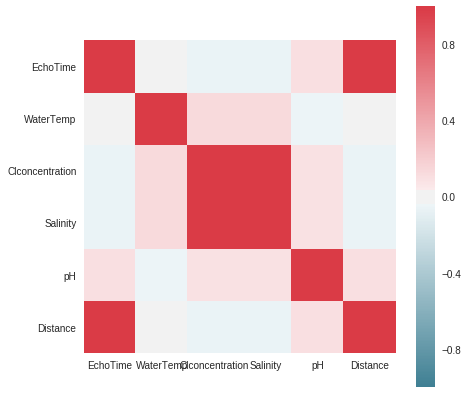

In [33]:
f, ax = plt.subplots(figsize=(7, 7))
correlation = Regression_Data.corr()
sns.heatmap(correlation, mask=np.zeros_like(correlation, dtype=np.bool), 
            cmap = sns.diverging_palette(220, 10, as_cmap=True), square=True, ax = ax)
plt.show()

## Linear Regression

In [34]:
reg = linear_model.LinearRegression()
reg.fit(df_x_train, df_y_train)

coefficients = reg.coef_.tolist()
intercept = reg.intercept_.tolist()
mean_square_error = np.mean((reg.predict(df_x_test) - df_y_test)**2)
mean_square_error

Distance    1.298779e-16
dtype: float64

In [35]:
variance = reg.score(df_x_test, df_y_test)
variance

0.99999999970161058

## Scatter Matrix

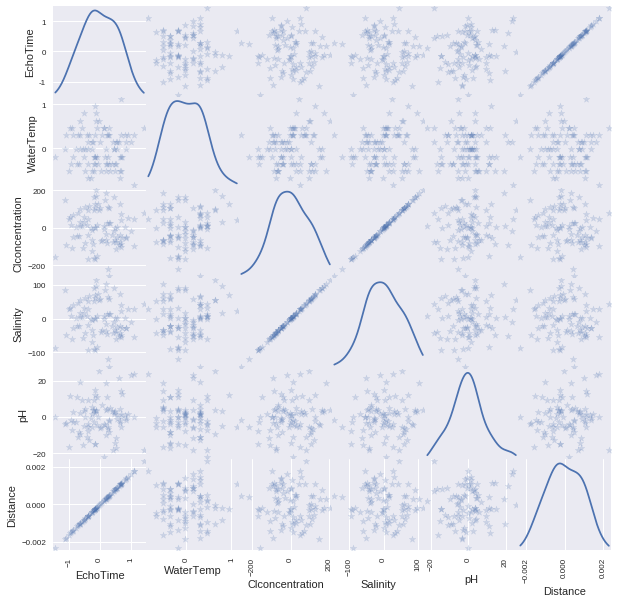

In [36]:
scatter_matrix(Regression_Data,alpha=0.2, figsize=(10, 10), diagonal='kde', grid=True, marker='*')
plt.show()

# Feature Selection

## Ridge Regression

In [37]:
alphas = 10**(np.linspace(-5,0,100))
Ridge_df = pd.DataFrame()
model = Ridge()
coeff =  []
for a in alphas:
    model.set_params(alpha = a)
    model.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df = pd.DataFrame({'EchoTime':[model.coef_[0][0]],'WaterTemp':[model.coef_[0][1]],
                       'Clconcentration':[model.coef_[0][2]],'Salinity':[model.coef_[0][3]], 'pH':[model.coef_[0][4]]})
    Ridge_df = Ridge_df.append(df)

In [38]:
trace0 = Scatter(
    x = alphas,
    y = Ridge_df['EchoTime'],
    name = 'EchoTime',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
    )
trace1 = Scatter(
    x = alphas,
    y = Ridge_df['WaterTemp'],
    name = 'WaterTemp',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Ridge_df['Clconcentration'],
    name = 'Clconcentration',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Ridge_df['Salinity'],
    name = 'Salinity',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas,
    y = Ridge_df['pH'],
    name = 'pH',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4]

layout = dict(xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='RidgeRegression.html')

In [39]:
ridge2 = Ridge(alpha=0.005, normalize=True)
ridge2.fit(df_x_train, df_y_train.Distance) # Fit a ridge regression on the training data
pred2 = ridge2.predict(df_x_test) # Use this model to predict the test data
print(pd.Series(ridge2.coef_, index=df_x_train.columns)) # Print coefficients
print(mean_squared_error(df_y_test, pred2)) # Calculate the test MSE

EchoTime           1.591859e-03
WaterTemp         -2.639411e-07
Clconcentration   -9.154268e-11
Salinity          -1.653764e-10
pH                 7.819294e-08
dtype: float64
1.74059123602e-11


In [40]:
ridgecv = RidgeCV(alphas=alphas, scoring='mean_squared_error', normalize=True)
ridgecv.fit(df_x_train, df_y_train)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning:

Scoring method mean_squared_

RidgeCV(alphas=array([  1.00000e-05,   1.12332e-05, ...,   8.90215e-01,   1.00000e+00]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
    scoring='mean_squared_error', store_cv_values=False)

## Lasso

In [41]:
Lasso_df = pd.DataFrame()
coeff  = []
lasso = Lasso(max_iter = 10000, normalize = True)
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(df_x_train, df_y_train)
    coeff.append(model.coef_)
    df_new = pd.DataFrame({'EchoTime':[model.coef_[0][0]],'WaterTemp':[model.coef_[0][1]],
                       'Clconcentration':[model.coef_[0][2]],'Salinity':[model.coef_[0][3]], 'pH':[model.coef_[0][4]]})
    Lasso_df = Lasso_df.append(df_new)

In [42]:
trace0 = Scatter(
    x = alphas,
    y = Lasso_df['EchoTime'],
    name = 'EchoTime',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4)
    )
trace1 = Scatter(
    x = alphas,
    y = Lasso_df['WaterTemp'],
    name = 'WaterTemp',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4)
)
trace2 = Scatter(
    x = alphas,
    y = Lasso_df['Clconcentration'],
    name = 'Clconcentration',
    line = dict(
        color = ('rgb(205, 12, 24)'),
        width = 4,
        dash = 'dash') # dash options include 'dash', 'dot', and 'dashdot'
)
trace3 = Scatter(
    x = alphas,
    y = Lasso_df['Salinity'],
    name = 'Salinity',
    line = dict(
        color = ('rgb(22, 96, 167)'),
        width = 4,
        dash = 'dash')
)
trace4 = Scatter(
    x = alphas,
    y = Lasso_df['pH'],
    name = 'pH',
    line = dict(
        color = ('rgb(200, 80, 140)'),
        width = 4,)
)

data = [trace0, trace1, trace2, trace3, trace4]

layout = dict(xaxis = dict(title = 'Alpha'),
              yaxis = dict(title = 'Weights'),
              )

fig = dict(data = data, layout = layout)
plot.iplot(fig, filename='LassoRegression.html')

In [43]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000, normalize=True)
lassocv.fit(df_x_train, df_y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(df_x_train, df_y_train)
mean_squared_error(df_y_test, lasso.predict(df_x_test))

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



5.7155032522645655e-13

In [44]:
pd.Series(lasso.coef_, index=df_x_test.columns)

EchoTime           0.001598
WaterTemp         -0.000000
Clconcentration   -0.000000
Salinity          -0.000000
pH                 0.000000
dtype: float64

In [45]:
# So only features we can take is EchoTime

# Model is by taking EchoTime

In [46]:
model = sm.ols(formula = "Distance ~ EchoTime", 
                  data = Regression_Data[:80]).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Distance   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.140e+12
Date:                Sun, 02 Apr 2017   Prob (F-statistic):               0.00
Time:                        17:28:05   Log-Likelihood:                 1377.6
No. Observations:                  80   AIC:                            -2751.
Df Residuals:                      78   BIC:                            -2746.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.724e-10   9.11e-10      0.518      0.606   -1.34e-09    2.29e-09
EchoTime       0.0016    1.5e-09   1.07e+06      0.000       0.002       0.002
==============================================================================
Omnibus:                        5.100   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                4.316
Skew:                           0.523   Prob(JB):                        0.116
Kurtosis:                       3.447   Cond. No.                         1.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

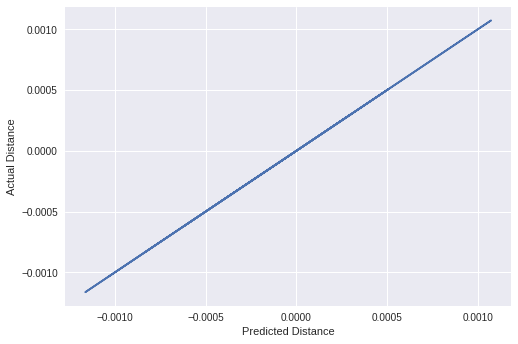

In [53]:
y_model = model.predict(df_x_test)
plt.plot(y_model, df_y_test)
plt.xlabel("Predicted Distance")
plt.ylabel("Actual Distance")
plt.show()

In [48]:
SSE_new = ((y_model - df_y_test.Distance)**2).sum()
mean = df_y_test.Distance.mean()
TSS = ((y_model - mean)**2).sum()
R_Square_new = 1-(SSE_new/TSS)
RMSE = (((df_y_test.Distance - mean)**2).sum()) * ((1 - R_Square_new)/100)
RMSE

1.5190279470288893e-17

## Box Plot

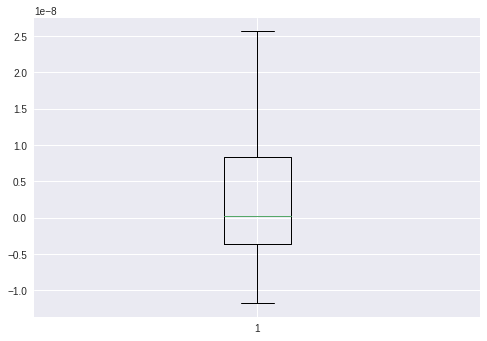

In [49]:
residual_new = np.array(y_model - df_y_test.Distance)
plt.boxplot(residual_new)
plt.show()

## Residual Histogram

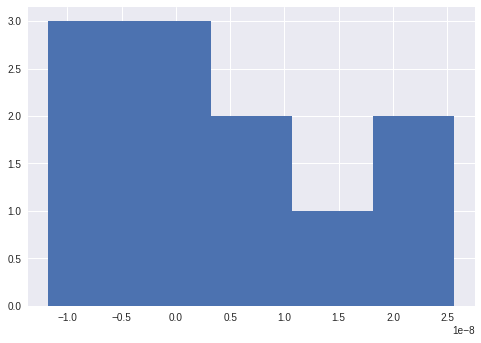

In [50]:
plt.hist(residual_new, bins=5)
plt.show()

## Test Hypothesis

In [51]:
name = ['F statistics', 'p_value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name,test))

[('F statistics', 0.71987610896289078), ('p_value', 0.84235152581657036)]